# Results analyses

This notebook was designed to take the predictions generated after training the models, and performing results analyses based on several metrics.

## Basic imports

In [1]:
import pandas as pd
from sklearn import metrics
import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

np.set_printoptions(precision=4, suppress=True)

Matplotlib created a temporary config/cache directory at /tmp/matplotlib-13d_ro8b because the default path (/.config/matplotlib) is not a writable directory; it is highly recommended to set the MPLCONFIGDIR environment variable to a writable directory, in particular to speed up the import of Matplotlib and to better support multiprocessing.


## Functions for classification models

Below are the definitions of functions to evaluate the classification models.

In [2]:
def eval_model(dfs):
    acc_list = list()
    bal_acc_list = list()
    prec_macro_list = list()
    prec_micro_list = list()
    rec_macro_list = list()
    f1_macro_list = list()
    f1_micro_list = list()
    
    for df in dfs:
        acc = metrics.accuracy_score(df['y_true'], df['y_pred'])
        balanced_acc = metrics.balanced_accuracy_score(df['y_true'], df['y_pred'])
        precision_macro = metrics.precision_score(df['y_true'], df['y_pred'], average='macro')
        recall_macro = metrics.recall_score(df['y_true'], df['y_pred'], average='macro')
        f1_macro = metrics.f1_score(df['y_true'], df['y_pred'], average='macro')
        f1_micro = metrics.f1_score(df['y_true'], df['y_pred'], average='micro')
        
        acc_list.append(acc)
        bal_acc_list.append(balanced_acc)
        prec_macro_list.append(precision_macro)
        rec_macro_list.append(recall_macro)
        f1_macro_list.append(f1_macro)
        f1_micro_list.append(f1_micro)

    print('Accuracy')
    print('Mean:', np.mean(acc_list), ', Std:', np.std(acc_list))
    print('Balanced accuracy')
    print('Mean:', np.mean(bal_acc_list), ', Std:', np.std(bal_acc_list))
    print('Precision macro')
    print('Mean:', np.mean(prec_macro_list), ', Std:', np.std(prec_macro_list))
    print('Recall macro')
    print('Mean:', np.mean(rec_macro_list), ', Std:', np.std(rec_macro_list))
    print('F1 macro')
    print('Mean:', np.mean(f1_macro_list), ', Std:', np.std(f1_macro_list))
    print('F1 micro')
    print('Mean:', np.mean(f1_micro_list), ', Std:', np.std(f1_micro_list))

In [8]:
def avg_cf(dfs, ax, lbl_names=None):
    cf_list = list()
    
    for df in dfs:
        cf = metrics.confusion_matrix(df['y_true'], df['y_pred'],normalize='true')
        cf_list.append(cf)
    cf_mean = np.mean(cf_list, axis=0)
    
    sns.heatmap(cf_mean, vmin=0, vmax=1, annot=True, fmt='0.2f', cbar=False, cmap='coolwarm', ax=ax)
    if lbl_names is not None:
        ax.set_xticklabels(lbl_names)
        ax.set_yticklabels(lbl_names)
    return ax

In [9]:
from sklearn.dummy import DummyClassifier

def compute_dummy(df, strategy='prior'):
    clf = DummyClassifier(strategy=strategy)
    clf.fit(df['y_true'], df['y_true'])
    df['y_pred'] = clf.predict(df['y_true'])
    return df

In [58]:
def eval_all(base_paths, lbl_names=None, dummy_strategy=None):
    for base_path in base_paths:
        dfs = list()
        print('\n', base_path)
        for i in range(4):
            path = os.path.join(base_path, f'split_{i+1}', 'preds.csv')
            df = pd.read_csv(path, index_col=0)
            if dummy_strategy is not None:
                df = compute_dummy(df, dummy_strategy)
            dfs.append(df)
        eval_model(dfs, base_path)
        #fig, ax = plt.subplots()
        #avg_cf(dfs, ax, lbl_names=lbl_names)
        #plt.show()

# Evaluating models that classify the water level

Below, I evaluate the models aimed at, given an input image or a sequence of input images, classify it according to the water level.
So far, the classes are *low*, *medium*, *high* and *flood*.

In [75]:
base_paths = list()
base_paths.append('/models/flow_v0')
base_paths.append('/models/single_rgb_v1')
base_paths.append('/models/single_gray_flow_v0')
base_paths.append('/models/stack_flow_v0')

In [76]:
lbl_names = ['low', 'medium', 'high', 'flood']
eval_all(base_paths, lbl_names=lbl_names)


 /models/flow_v0
Accuracy
Mean: 0.9320598475256072 , Std: 0.03160453587939705
Balanced accuracy
Mean: 0.5390297689426399 , Std: 0.03885927410750043
Precision macro
Mean: 0.3145555383379591 , Std: 0.03811737687084649
Recall macro
Mean: 0.5390297689426399 , Std: 0.03885927410750043
F1 macro
Mean: 0.33913376548332086 , Std: 0.05614943224939343
F1 micro
Mean: 0.9320598475256072 , Std: 0.03160453587939705

 /models/single_rgb_v1
Accuracy
Mean: 0.9575422839902221 , Std: 0.026900727588661237
Balanced accuracy
Mean: 0.6441085060695999 , Std: 0.062376137221326476
Precision macro
Mean: 0.46441243494058676 , Std: 0.12255792512622714
Recall macro
Mean: 0.6441085060695999 , Std: 0.062376137221326476
F1 macro
Mean: 0.48445719648954677 , Std: 0.10685096613971372
F1 micro
Mean: 0.9575422839902221 , Std: 0.026900727588661237

 /models/single_gray_flow_v0
Accuracy
Mean: 0.9301769317112671 , Std: 0.04278425378185786
Balanced accuracy
Mean: 0.6378865240438746 , Std: 0.08724746406621854
Precision macro
Me

## Dummy classifiers

Here, I evaluate a set of dummy classifiers as baselines.

In [77]:
print('Majority class')
eval_all([base_paths[0]], lbl_names=lbl_names, dummy_strategy='prior')

print('\n\nStratified random')
eval_all([base_paths[0]], lbl_names=lbl_names, dummy_strategy='stratified')

print('\n\nUniform random')
eval_all([base_paths[0]], lbl_names=lbl_names, dummy_strategy='uniform')

Majority class

 /models/flow_v0
Accuracy
Mean: 0.9890806832949095 , Std: 0.002511393465124915
Balanced accuracy
Mean: 0.25 , Std: 0.0
Precision macro
Mean: 0.24727017082372738 , Std: 0.0006278483662812287
Recall macro
Mean: 0.25 , Std: 0.0
F1 macro
Mean: 0.24862719224464655 , Std: 0.00031703991883200633
F1 micro
Mean: 0.9890806832949095 , Std: 0.002511393465124915


Stratified random

 /models/flow_v0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

Accuracy
Mean: 0.9777782916826561 , Std: 0.0053126992939211285
Balanced accuracy
Mean: 0.2508660551068819 , Std: 0.004129664929554581
Precision macro
Mean: 0.25076567685128587 , Std: 0.0037519369378892584
Recall macro
Mean: 0.2508660551068819 , Std: 0.004129664929554581
F1 macro
Mean: 0.2508110340583165 , Std: 0.00393439176001439
F1 micro
Mean: 0.9777782916826563 , Std: 0.005312699293921111


Uniform random

 /models/flow_v0
Accuracy
Mean: 0.2511004176948649 , Std: 0.005369907535989049
Balanced accuracy
Mean: 0.2348962454087404 , Std: 0.030106006886530385
Precision macro
Mean: 0.2498101839402056 , Std: 0.00044662209193319525
Recall macro
Mean: 0.2348962454087404 , Std: 0.030106006886530385
F1 macro
Mean: 0.10523040347038665 , Std: 0.0008477328391730666
F1 micro
Mean: 0.2511004176948649 , Std: 0.005369907535989049


# Evaluating models that classify changes to the water level

Below, I evaluate the models aimed at, given a pair of input images or a sequence of such pairs, identify if the water level is stable, if it is increasing, or if it is decreasing.
So far, the classes are *up*, *down*, and *still*.

In [78]:
base_paths = list()
base_paths.append('/models/single_flow_diffs_v0')
base_paths.append('/models/single_gray_flow_diffs_v0')
base_paths.append('/models/stack_flow_diffs_v0')
base_paths.append('/models/pair_gray_diffs_v0')

In [79]:
lbl_names = ['down', 'still', 'up']
eval_all(base_paths, lbl_names=lbl_names)


 /models/single_flow_diffs_v0
Accuracy
Mean: 0.9684195872005404 , Std: 0.011021095401507848
Balanced accuracy
Mean: 0.8059583107859892 , Std: 0.081274736876028
Precision macro
Mean: 0.3943965360720863 , Std: 0.019000180215439703
Recall macro
Mean: 0.8059583107859892 , Std: 0.081274736876028
F1 macro
Mean: 0.4360744195295928 , Std: 0.033193047390634924
F1 micro
Mean: 0.9684195872005404 , Std: 0.011021095401507848

 /models/single_gray_flow_diffs_v0
Accuracy
Mean: 0.9607613966331306 , Std: 0.011017122352356662
Balanced accuracy
Mean: 0.7141943889300738 , Std: 0.10903554358762857
Precision macro
Mean: 0.37723826924394127 , Std: 0.02022764624292656
Recall macro
Mean: 0.7141943889300738 , Std: 0.10903554358762857
F1 macro
Mean: 0.4054671361844761 , Std: 0.036274951827149994
F1 micro
Mean: 0.9607613966331306 , Std: 0.011017122352356662

 /models/stack_flow_diffs_v0
Accuracy
Mean: 0.9730368663526555 , Std: 0.007318274986442864
Balanced accuracy
Mean: 0.8110254817831833 , Std: 0.0454882404038

## Dummy classifiers

In [80]:
print('Majority class')
eval_all([base_paths[0]], lbl_names=lbl_names, dummy_strategy='prior')

print('\n\nStratified random')
eval_all([base_paths[0]], lbl_names=lbl_names, dummy_strategy='stratified')

print('\n\nUniform random')
eval_all([base_paths[0]], lbl_names=lbl_names, dummy_strategy='uniform')

Majority class

 /models/single_flow_diffs_v0
Accuracy
Mean: 0.9962205480811681 , Std: 0.000590735748925158
Balanced accuracy
Mean: 0.3333333333333333 , Std: 0.0
Precision macro
Mean: 0.33207351602705604 , Std: 0.00019691191630838412
Recall macro
Mean: 0.3333333333333333 , Std: 0.0
F1 macro
Mean: 0.3327022028171166 , Std: 9.885759647760516e-05
F1 micro
Mean: 0.9962205480811681 , Std: 0.000590735748925158


Stratified random

 /models/single_flow_diffs_v0


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Pr

Accuracy
Mean: 0.9918619810521335 , Std: 0.001263810021453047
Balanced accuracy
Mean: 0.3318748384031739 , Std: 0.00023588011978449726
Precision macro
Mean: 0.33207424215562376 , Std: 0.00020125921574246035
Recall macro
Mean: 0.3318748384031739 , Std: 0.00023588011978449726
F1 macro
Mean: 0.3319745038783879 , Std: 0.0002143206406322822
F1 micro
Mean: 0.9918619810521335 , Std: 0.001263810021453047


Uniform random

 /models/single_flow_diffs_v0
Accuracy
Mean: 0.32957614591966145 , Std: 0.0022415911751562717
Balanced accuracy
Mean: 0.3510351379834642 , Std: 0.03990877947871048
Precision macro
Mean: 0.33336542260247 , Std: 0.00036944780828680615
Recall macro
Mean: 0.3510351379834642 , Std: 0.03990877947871048
F1 macro
Mean: 0.16773487468535347 , Std: 0.0007535477231575158
F1 micro
Mean: 0.32957614591966145 , Std: 0.0022415911751562717


# Deployable figures

## Confusion matrices

In [55]:
def provide_all_subplots(base_paths, plot_titles, figsize=(8,8), lbl_names=None, dummy_strategy=None):
    fig, axs = plt.subplots(nrows=2, ncols=2, figsize=figsize)
    for j, base_path in enumerate(base_paths):
        dfs = list()
        for i in range(4):
            path = os.path.join(base_path, f'split_{i+1}', 'preds.csv')
            df = pd.read_csv(path, index_col=0)
            if dummy_strategy is not None:
                df = compute_dummy(df, dummy_strategy)
            dfs.append(df)
        axs[j//2,j%2] = avg_cf(dfs, axs[j//2,j%2], lbl_names=lbl_names)
        axs[j//2,j%2].set_title(plot_titles[j])
    fig.tight_layout()
    return fig

### Water level

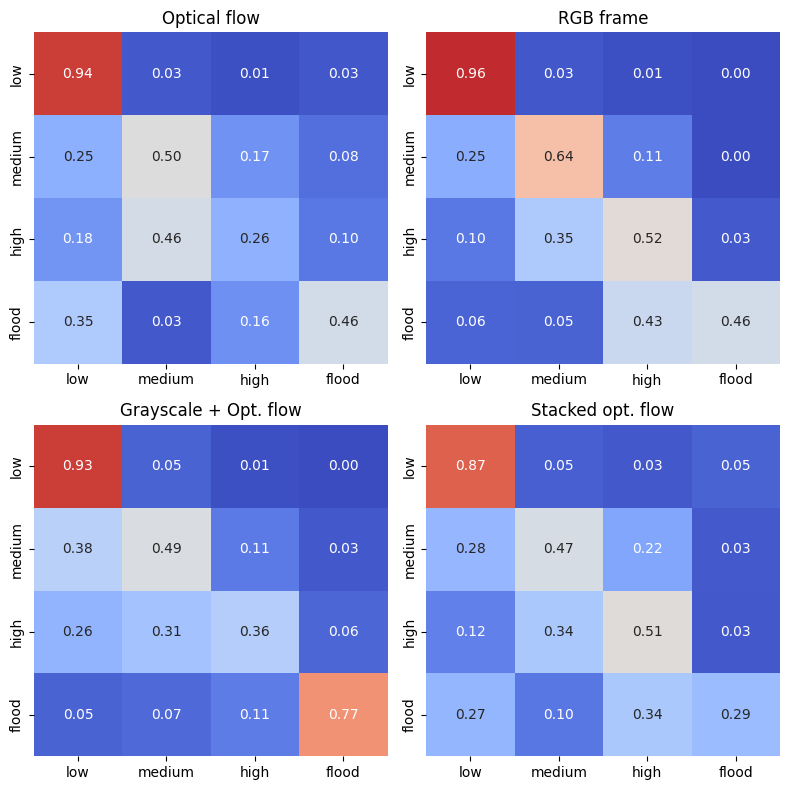

In [56]:
base_paths = list()
base_paths.append('/models/flow_v0')
base_paths.append('/models/single_rgb_v1')
base_paths.append('/models/single_gray_flow_v0')
base_paths.append('/models/stack_flow_v0')

plot_titles = ['Optical flow', 'RGB frame', 'Grayscale + Opt. flow', 'Stacked opt. flow']
lbl_names = ['low', 'medium', 'high', 'flood']

fig = provide_all_subplots(base_paths, plot_titles, lbl_names=lbl_names)
plt.show()
fig.savefig('cf_level.pdf')

### Changes to the water level

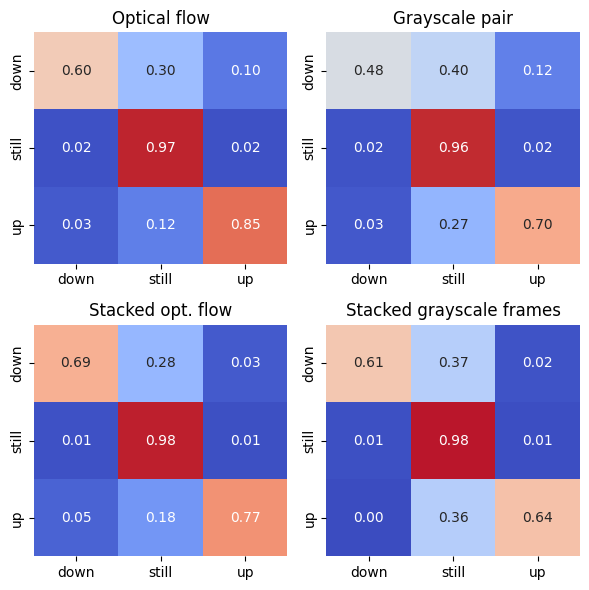

In [63]:
base_paths = list()
base_paths.append('/models/single_flow_diffs_v0')
base_paths.append('/models/single_gray_flow_diffs_v0')
base_paths.append('/models/stack_flow_diffs_v0')
base_paths.append('/models/pair_gray_diffs_v0')

plot_titles = ['Optical flow', 'Grayscale pair', 'Stacked opt. flow', 'Stacked grayscale frames']
lbl_names = ['down', 'still', 'up']

fig = provide_all_subplots(base_paths, plot_titles, figsize=(6,6), lbl_names=lbl_names)
plt.show()
fig.savefig('cf_diffs.pdf')